In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Downloads/top_animes_after_cleaning.csv')
df

,Japanese,Type,Episodes,Status,Aired,Premiered,Producers,Licensors,Studios,Source,...,Favorites,description,Name,English Name,Recommended,Mixed Feelings,Not Recommended,Themes,Demographics,Seasonal
0,葬送のフリーレン,TV,28,Finished Airing,"Sep 29, 2023 to Mar 22, 2024",Fall 2023,"Aniplex, Dentsu, Shogakukan-Shueis...","None found, add some",Madhouse,Manga,...,43111,During their decade-long quest to defeat the D...,Sousou no Frieren,Frieren: Beyond Journey's End,493,67,42,['Unknown-Themes'],['Shounen'],False
1,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,"Aniplex, Square Enix, Mainichi Bro...","Funimation, Aniplex of America",Bones,Manga,...,226182,After a horrific alchemy experiment goes wrong...,Fullmetal Alchemist: Brotherhood,NaN,912,59,39,['Military'],['Shounen'],False
2,STEINS;GATE,TV,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,"Frontier Works, Media Factory, Kad...",Funimation,White Fox,Visual novel,...,189734,Eccentric scientist Rintarou Okabe has a never...,Steins;Gate,NaN,1006,73,73,"['Psychological', 'TimeTravel']",['Unknown-Demographic'],True
3,銀魂°,TV,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,...,16680,"Gintoki, Shinpachi, and Kagura return as the f...",Gintama°,Gintama Season 4,79,3,1,"['GagHumor', 'Historical', 'Parody', 'Samurai']",['Shounen'],False
4,進撃の巨人 Season3 Part.2,TV,10,Finished Airing,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,"Production I.G, Dentsu, Mainichi B...",Funimation,Wit Studio,Manga,...,58793,Seeking to restore humanity's diminishing hope...,Shingeki no Kyojin Season 3 Part 2,Attack on Titan Season 3 Part 2,198,9,11,"['Gore', 'Military', 'Survival']",['Shounen'],True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15257,找小哥哥,Movie,1,Finished Airing,1958,NaN,"None found, add some","None found, add some","None found, add some",Unknown,...,0,No synopsis information has been added to this...,Zhao Xiao Ge Ge,NaN,0,0,0,['Unknown-Themes'],['Kids'],True
15258,这是一首歌,Movie,1,Finished Airing,1980,NaN,"None found, add some","None found, add some",Shanghai Animation Film Studio,Original,...,0,No synopsis information has been added to this...,Zhe Shi Yi Shou Ge,NaN,0,0,0,['Unknown-Themes'],['Kids'],True
15259,浙水千秋,ONA,6,Finished Airing,2018,NaN,"None found, add some","None found, add some","None found, add some",Original,...,0,No synopsis information has been added to this...,Zhe Shui Qianqiu,NaN,0,0,0,['Unknown-Themes'],['Kids'],True
15260,这个年纪还能当大侠吗,ONA,10,Finished Airing,"Jan 5, 2023 to Mar 2, 2023",NaN,NetEase,"None found, add some",Painting Dream,Game,...,0,"After the Lao Bai left the big city, he return...",Zhege Nianji Huan Neng Dang Daxia Ma,NaN,0,0,0,['Unknown-Themes'],['Unknown-Demographic'],True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15262 entries, 0 to 15261
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Japanese         15047 non-null  object 
 1   Type             15262 non-null  object 
 2   Episodes         15262 non-null  object 
 3   Status           15262 non-null  object 
 4   Aired            15262 non-null  object 
 5   Premiered        5527 non-null   object 
 6   Producers        15262 non-null  object 
 7   Licensors        15262 non-null  object 
 8   Studios          15253 non-null  object 
 9   Source           15262 non-null  object 
 10  Genres           15262 non-null  object 
 11  Duration         15262 non-null  object 
 12  Rating           15262 non-null  object 
 13  Score            15262 non-null  float64
 14  Ranked           15262 non-null  int64  
 15  Popularity       15262 non-null  int64  
 16  Members          15262 non-null  int64  
 17  Favorites   

In [14]:
df.nunique()

Japanese           14305
Type                   7
Episodes             216
Status                 2
Aired              10658
Premiered            238
Producers           4235
Licensors            242
Studios             1277
Source                17
Genres               849
Duration             317
Rating                 7
Score                556
Ranked             15246
Popularity         14260
Members            10215
Favorites           1876
description        13618
Name               15258
English Name        6736
Recommended          294
Mixed Feelings       104
Not Recommended      104
Themes               876
Demographics           8
Seasonal               2
Primary Genre         37
dtype: int64

In [5]:
# Drop rows with missing values in essential columns for this analysis
df = df.dropna(subset=['Genres', 'Score', 'Popularity', 'Favorites'])

# Extract the main genre if there are multiple genres listed per anime
df['Primary Genre'] = df['Genres'].apply(lambda x: x.split(',')[0] if pd.notna(x) else x)

In [6]:
# Basic descriptive statistics
print(df[['Score', 'Ranked', 'Popularity', 'Favorites']].describe())

              Score        Ranked    Popularity      Favorites
count  15262.000000  15262.000000  15262.000000   15262.000000
mean       5.683993   7631.493448   9708.122527     751.310117
std        2.334854   4405.906909   6779.327272    5852.707458
min        0.000000      1.000000      1.000000       0.000000
25%        5.541000   3816.250000   3944.250000       0.000000
50%        6.351000   7631.500000   8933.000000       6.000000
75%        7.081000  11446.750000  14165.000000      68.000000
max        9.361000  15262.000000  26654.000000  226182.000000


In [7]:
# Correlation matrix
correlation_matrix = df[['Score', 'Ranked', 'Popularity', 'Favorites']].corr()
print(correlation_matrix)

               Score    Ranked  Popularity  Favorites
Score       1.000000 -0.828660   -0.816409   0.135060
Ranked     -0.828660  1.000000    0.811021  -0.194427
Popularity -0.816409  0.811021    1.000000  -0.175299
Favorites   0.135060 -0.194427   -0.175299   1.000000


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

## Plot 1: Bar Chart of Anime Genres

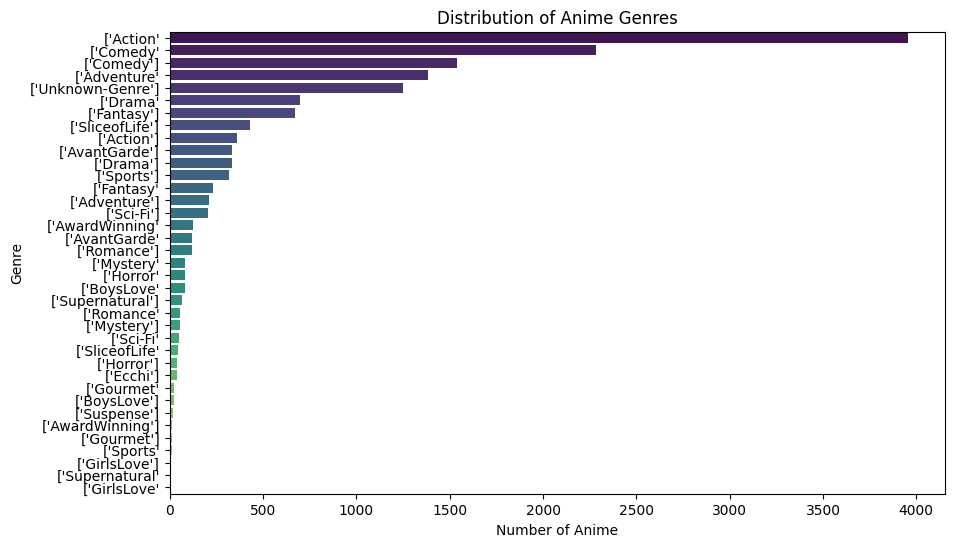

In [15]:
def genre_distribution_plot(data):
    plt.figure(figsize=(10, 6))
    genre_counts = data['Primary Genre'].value_counts()
    sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
    plt.title('Distribution of Anime Genres')
    plt.xlabel('Number of Anime')
    plt.ylabel('Genre')
    plt.show()
genre_distribution_plot(df)

## Plot 2: Scatter Plot of Score vs. Popularity

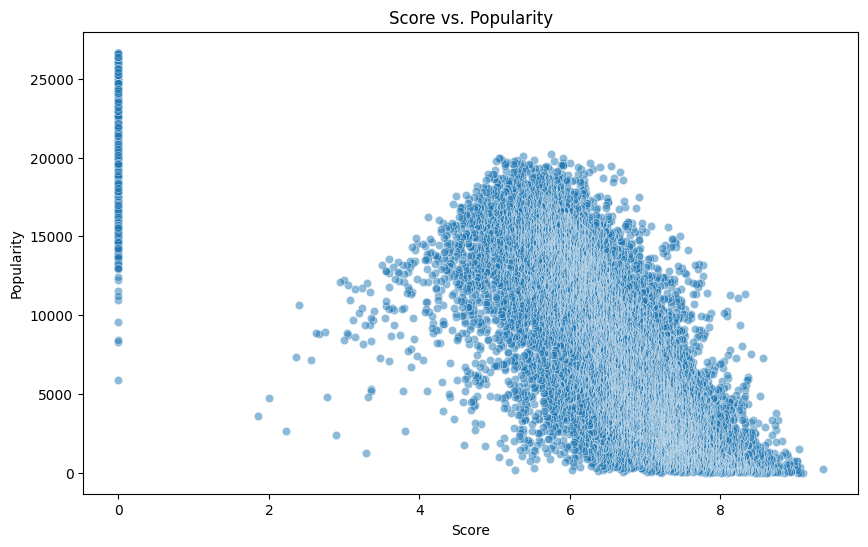

In [12]:
def score_vs_popularity_scatter(data):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Score', y='Popularity', data=data, alpha=0.5)
    plt.title('Score vs. Popularity')
    plt.xlabel('Score')
    plt.ylabel('Popularity')
    plt.show()

score_vs_popularity_scatter(df)

## Plot 3: Heatmap of Correlations Among Popularity Metrics

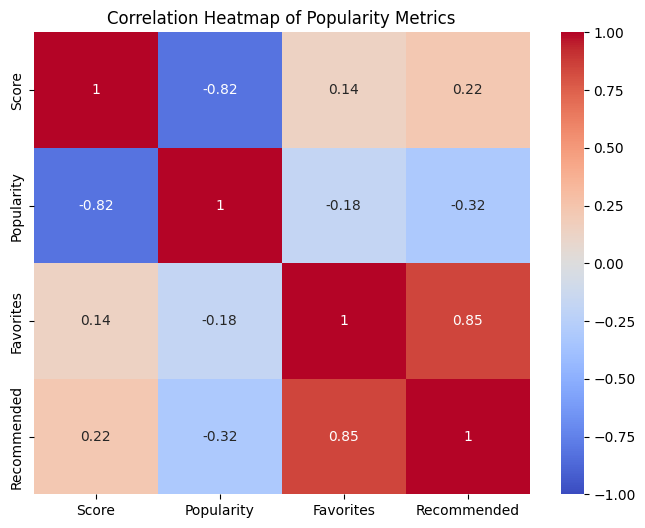

In [13]:
def popularity_correlation_heatmap(data):
    plt.figure(figsize=(8, 6))
    popularity_metrics = data[['Score', 'Popularity', 'Favorites', 'Recommended']]
    correlation = popularity_metrics.corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap of Popularity Metrics')
    plt.show()

popularity_correlation_heatmap(df)